# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [0]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=37dac04cf8018c460b747101bc831bd370ce243fc5ba5002eb32cd1c08039166
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
# wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
# !unzip reviews.zip

In [0]:
# crawl hotel reviews at burlington, id:154984
# !python3 trip-advisor-crawler.py -o hotel_data ca:154984
# !python3 parser.py -d hotel_data -o reviews.csv

# !zip -r /content/hotel_html2.zip /content/hotel_data
# from google.colab import files
# files.download("/content/hotel_html.zip")

In [0]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
# input sentence, output score (rule-based model ie.decision-tree)
# lexical-feature, each word has a value (discrete or continuous)
# symtactical, also consider the entire sentence
nltk.download("vader_lexicon") 
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Q1. Sentiment Analysis and Aggregation

In [0]:
df=pd.read_csv('reviews.csv',header=None,usecols=[1,2,3,4])
df.columns=['hotel_name','review','ratingScore','groundTruth']

In [0]:
df.head()

,hotel_name,review,ratingScore,groundTruth
0,"Courtyard by Marriott Hamilton,","""clean hotel good for business and family trav...",4,positive
1,"Courtyard by Marriott Hamilton,","""Were in town with 2 other couples to see a co...",4,positive
2,"Courtyard by Marriott Hamilton,","""This hotel is very nice and clean. The rooms...",5,positive
3,"Courtyard by Marriott Hamilton,","""Great place to stay. Front desk staff were f...",4,positive
4,"Courtyard by Marriott Hamilton,","""We required a overnight stay near Juravinski ...",5,positive


## (a). Compute average Vader sentiment and average ground truth rating per hotel.

In [0]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence) #get sentiment score
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
reviews=df.review.values
reviewDF = evalSentences(reviews, to_df=True, columns=['review','vader'])

100%|██████████| 4711/4711 [00:05<00:00, 849.13it/s]


In [0]:
reviewDF.head()

,review,vader
0,"""clean hotel good for business and family trav...",0.8878
1,"""Were in town with 2 other couples to see a co...",0.9743
2,"""This hotel is very nice and clean. The rooms...",0.9037
3,"""Great place to stay. Front desk staff were f...",0.9638
4,"""We required a overnight stay near Juravinski ...",0.3919


In [0]:
df_with_vader=pd.merge(df,reviewDF,on='review')
df_with_vader.head()

,hotel_name,review,ratingScore,groundTruth,vader
0,"Courtyard by Marriott Hamilton,","""clean hotel good for business and family trav...",4,positive,0.8878
1,"Courtyard by Marriott Hamilton,","""Were in town with 2 other couples to see a co...",4,positive,0.9743
2,"Courtyard by Marriott Hamilton,","""This hotel is very nice and clean. The rooms...",5,positive,0.9037
3,"Courtyard by Marriott Hamilton,","""Great place to stay. Front desk staff were f...",4,positive,0.9638
4,"Courtyard by Marriott Hamilton,","""We required a overnight stay near Juravinski ...",5,positive,0.3919


## (b). Rank hotels by rating score and Vader

In [0]:
hotelAvgRatingVader=df_with_vader.groupby('hotel_name').mean()
top5Rating=hotelAvgRatingVader.sort_values(by='ratingScore',ascending=False).head()
bottom5Rating=hotelAvgRatingVader.sort_values(by='ratingScore',ascending=False).tail()
top5Vader=hotelAvgRatingVader.sort_values(by='vader',ascending=False).head()
bottom5Vader=hotelAvgRatingVader.sort_values(by='vader',ascending=False).tail()

In [0]:
display(top5Rating['ratingScore'])

hotel_name
Heart Of Burlington Bed and Breakfast           5.000000
Creekside B&amp;B and Guest Suite               4.909091
Courtyard By Marriott Burlington                4.800000
Best Western Premier C Hotel By Carmen&#39;s    4.670833
Rose Arden B&amp;B                              4.500000
Name: ratingScore, dtype: float64

In [0]:
display(top5Vader['vader'])

hotel_name
Heart Of Burlington Bed and Breakfast           0.968500
Creekside B&amp;B and Guest Suite               0.941411
Rose Arden B&amp;B                              0.929675
Courtyard By Marriott Burlington                0.901708
Best Western Premier C Hotel By Carmen&#39;s    0.877896
Name: vader, dtype: float64

In [0]:
display(bottom5Rating['ratingScore'])

hotel_name
Comfort Inn Hamilton            3.133333
Knights Inn Burlington          2.866667
Days Inn by Wyndham Hamilton    2.606667
Hamilton Inn                    2.214286
Airport Inn                     2.123077
Name: ratingScore, dtype: float64

In [0]:
display(bottom5Vader['vader'])

hotel_name
Comfort Inn Hamilton            0.510705
Knights Inn Burlington          0.322747
Days Inn by Wyndham Hamilton    0.233383
Airport Inn                     0.131070
Hamilton Inn                    0.006121
Name: vader, dtype: float64

## **Answer for Q1(b)**

For top lists, the hotel "Rose Arden B&amp B" is ranked the last in terms of groundtruth rating score, while it is ranked the 3rd highest in terms of vader.

For bottom lists, "Hamilton Inn" is ranked the second-to-last in terms of groundtruth rating score, while it is ranked the last in terms of vader.

# Q2. Frequency Analysis

## (a). Top-50 most frequent words in reviews

In [0]:
def topkFrequentWords(reviewArray,k):
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
    
  # Top-k frequent terms
  counter = Counter()
  for review in reviewArray:
    counter.update([word.lower() 
                    for word 
                    in re.findall(r'\w+', review) 
                    if word.lower() not in stop and len(word) > 2])
  topk = counter.most_common(k)
  return topk

In [0]:
df_pos=df_with_vader[df_with_vader.groundTruth=='positive']
df_neg=df_with_vader[df_with_vader.groundTruth=='negative']

In [0]:
top50Pos=topkFrequentWords(df_pos.review.values,50)
top50Neg=topkFrequentWords(df_neg.review.values,50)

In [0]:
top50Pos

[('clean', 2025),
 ('great', 1991),
 ('breakfast', 1582),
 ('nice', 1538),
 ('good', 1446),
 ('would', 1359),
 ('stayed', 1195),
 ('friendly', 1190),
 ('comfortable', 1108),
 ('well', 1032),
 ('hamilton', 959),
 ('one', 946),
 ('area', 944),
 ('restaurant', 775),
 ('night', 765),
 ('pool', 755),
 ('location', 751),
 ('desk', 734),
 ('bed', 730),
 ('service', 702),
 ('front', 697),
 ('also', 681),
 ('helpful', 675),
 ('nthe', 672),
 ('time', 668),
 ('food', 645),
 ('excellent', 580),
 ('recommend', 574),
 ('place', 571),
 ('parking', 570),
 ('check', 570),
 ('get', 538),
 ('could', 520),
 ('really', 518),
 ('free', 514),
 ('like', 497),
 ('definitely', 489),
 ('back', 482),
 ('best', 473),
 ('close', 470),
 ('hot', 454),
 ('next', 435),
 ('two', 432),
 ('suite', 429),
 ('beds', 420),
 ('day', 412),
 ('everything', 412),
 ('floor', 400),
 ('quiet', 400),
 ('downtown', 394)]

In [0]:
top50Neg

[('would', 795),
 ('night', 610),
 ('one', 602),
 ('desk', 557),
 ('breakfast', 546),
 ('front', 502),
 ('good', 502),
 ('clean', 475),
 ('get', 457),
 ('stayed', 446),
 ('could', 414),
 ('nice', 386),
 ('time', 383),
 ('bed', 363),
 ('nthe', 356),
 ('check', 354),
 ('like', 348),
 ('floor', 340),
 ('told', 332),
 ('back', 328),
 ('place', 309),
 ('parking', 293),
 ('door', 292),
 ('people', 282),
 ('area', 282),
 ('great', 276),
 ('bathroom', 275),
 ('service', 272),
 ('day', 272),
 ('also', 271),
 ('next', 269),
 ('got', 265),
 ('even', 264),
 ('two', 259),
 ('well', 257),
 ('went', 257),
 ('booked', 252),
 ('location', 246),
 ('said', 243),
 ('wedding', 238),
 ('never', 233),
 ('around', 229),
 ('asked', 228),
 ('morning', 222),
 ('shower', 218),
 ('really', 215),
 ('pool', 213),
 ('comfortable', 201),
 ('water', 195),
 ('another', 194)]

## **Answer for Q2(a)**

* **Interesting**: Many positive words appear in negative reviews, such as "good", "clean", "nice" etc. So a single word cannot be a good indicator of review type.

* **locale-specific**: Many reviews both in positive and negative are associated with "breakfast", "bed", "pool", "parking", "desk". in addition, some negative reviews mentioned "bathroom", "shower" and "water".

## (b). Top-50 most frequent noun words in reviews

In [0]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

chunker = nltk.RegexpParser(grammar)

In [0]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords_eng)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [0]:
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF.review.values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
df_pos=df[df.groundTruth=='positive']
df_neg=df[df.groundTruth=='negative']
reviewDF_pos=evalSentences(df_pos.review.values, to_df=True, columns=['review','vader'])
reviewDF_neg=evalSentences(df_neg.review.values, to_df=True, columns=['review','vader'])

100%|██████████| 1273/1273 [00:01<00:00, 651.50it/s]


In [0]:
top50_pos_NP, df_NP_pos = newDataFrameTransformation(df_pos, reviewDF_pos)
top50_neg_NP, df_NP_neg = newDataFrameTransformation(df_neg, reviewDF_neg)

In [0]:
top50_pos_NP

[('front desk', 277),
 ('hot tub', 115),
 ('front desk staff', 103),
 ('downtown hamilton', 65),
 ('great place', 61),
 ('great stay', 61),
 ('comfort bed', 59),
 ('nthe room', 56),
 ('friendli staff', 56),
 ('great locat', 56),
 ('hotel staff', 55),
 ('great hotel', 54),
 ('next time', 52),
 ('first time', 51),
 ('admir inn', 51),
 ('room servic', 49),
 ('homewood suit', 49),
 ('nice hotel', 48),
 ('complimentari breakfast', 48),
 ('free breakfast', 48),
 ('next morn', 47),
 ('easi access', 47),
 ('full kitchen', 45),
 ('niagara fall', 44),
 ('tim horton', 44),
 ('king bed', 43),
 ('park lot', 43),
 ('great experi', 43),
 ('bedroom suit', 43),
 ('clean staff', 42),
 ('hamilton area', 37),
 ('pool area', 37),
 ('nthe hotel', 36),
 ('night stay', 36),
 ('custom servic', 36),
 ('good locat', 35),
 ('clean room', 34),
 ('mini fridg', 33),
 ('hotel room', 33),
 ('nice place', 33),
 ('second floor', 33),
 ('busi trip', 33),
 ('holiday inn', 32),
 ('king suit', 31),
 ('hotel restaur', 31),
 

In [0]:
top50_neg_NP

[('front desk', 245),
 ('front desk staff', 44),
 ('park lot', 42),
 ('next morn', 40),
 ('next day', 38),
 ('hot tub', 37),
 ('credit card', 35),
 ('nthe room', 32),
 ('hotel room', 30),
 ('custom servic', 27),
 ('air condition', 24),
 ('night stay', 24),
 ('first night', 22),
 ('complimentari breakfast', 22),
 ('hot water', 22),
 ('holiday inn', 22),
 ('second floor', 20),
 ('hotel staff', 20),
 ('room servic', 19),
 ('second night', 18),
 ('good locat', 17),
 ('continent breakfast', 17),
 ('bed bug', 17),
 ('clean staff', 17),
 ('good thing', 16),
 ('smoke room', 16),
 ('downtown hamilton', 16),
 ('staff member', 16),
 ('differ room', 16),
 ('room rate', 16),
 ('king bed', 15),
 ('breakfast buffet', 15),
 ('ice machin', 15),
 ('nthe hotel', 15),
 ('howard johnson', 15),
 ('free wifi', 14),
 ('queen bed', 13),
 ('non smoke room', 13),
 ('first time', 13),
 ('fire alarm', 13),
 ('first floor', 13),
 ('free breakfast', 13),
 ('famili member', 12),
 ('late check', 12),
 ('busi trip', 12

## **Answer for Q2(b)**

* **interesting**: Again, some positive terms, such as "good location", "clean staff", "good thing" etc., appear in negative feedbacks.

* **locale-specific**: "front desk" and "front desk staff" appear frequently in both positive and negative feedbacks. 

# Q3. Mutual Information

## (a). MI for top-50 most frequent words in reviews

In [0]:
def extract_word(reviewSeries):
  reviews = reviewSeries.values
  stop = set(stopwords.words('english'))
  counter = Counter()
  for review in reviews:
    counter.update([word.lower() 
                    for word 
                    in re.findall(r'\w+', review) 
                    if word.lower() not in stop and len(word) > 2])
  return set(counter.elements())

In [0]:
def dataFrameTransformation(hotelDf, reviewDF, k):
    reviews = reviewDF.review.values
    
    stop = set(stopwords.words('english'))
    stop.add('review')
    
    # Top-k frequent terms
    # re.findall(r'\w+', review): extract word in a review
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
word_set=extract_word(reviewDF.review)
word_list, df_with_words=dataFrameTransformation(df,reviewDF,k=len(word_set))
word_MI=getMI(word_list, df_with_words)

In [0]:
display(word_MI.iloc[:50,:])

,Word,MI Score
85,told,0.029898
276,dirty,0.025592
5,great,0.023702
13,friendly,0.019167
108,never,0.017566
534,worst,0.016283
114,said,0.016175
4,clean,0.015879
178,old,0.015201
461,walls,0.014330


## **Answer for Q3(a)**

* **Interesting**: In addition to strongly emotional words such as "friendly" and "rude", some verbs receive high MI scores. Examples include "told", "said", and "asked".

* **locale-specific**: some locale-specific words are "bathroom" and "toilet".



## (b). MI for top-50 most frequent noun words in reviews

In [0]:
def extract_NP(reviewSeries):
  reviews = reviewSeries.values
  counter = Counter()
  for review in reviews:
          counter.update(flatten([word
                          for word 
                          in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                          ]))
  return set(counter.elements())

In [0]:
NP_set=extract_NP(reviewDF.review)
NP_list, df_with_NP=newDataFrameTransformation(df,reviewDF,k=len(NP_set))
NP_MI=getMI(NP_list, df_with_NP)

In [0]:
display(NP_MI.iloc[:50,:])

,Word,MI Score
50,credit card,0.004776
0,front desk,0.004619
13,next day,0.002952
70,air condition,0.002762
158,smoke room,0.002753
229,fire alarm,0.002660
149,bed bug,0.002504
12,great place,0.001967
14,great stay,0.001967
147,ice machin,0.001918


## **Answer for Q3(b)**

* **Interesting**: some NP, such as "u2019t work" and "ho jo", does not make sense. They would be related with special activities, celebrations or items.

# Q4. Pointwise Mutual Information

## (a). PMI of top 50 words occuring with groundtruth

In [0]:
# Simple example of getting pairwise mutual information of a term
# PMI=0 -> independent
# PMI>0 -> x, y tends to appear together
# PMI>0 -> x, y tends to appear individually
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return px,py,pxy,pmi

In [0]:
def pmiAllTermOccur(df,term_list,gt):
  pmi_list=[]
  for term in term_list:
    # filter out numerical word since they does not contain useful information
    if str.isdigit(term[0]):
      pass
    else:
      px,py,pxy,pmi=pmiIndivCal(df,term[0],gt)
      pmi_list.append([term[0]]+[px]+[py]+[pxy]+[pmi])
  pmi_df=pd.DataFrame(pmi_list)
  pmi_df.columns=['term','px','py','pxy','pmi']
  return pmi_df.sort_values(by=['pmi'],ascending=0)

In [0]:
word_pmi_pos=pmiAllTermOccur(df_with_words,word_list,'positive')

In [0]:
# Filter out low frequency words since they would appear due to coincidence
# and their PMI tells nothing.
# For example, a word just appear once in a positive review, then its py is sam as pxy,
# thus its PMI is just the inverse of px.

# In this analysis, just calculate pmi of words drawn from top 150 most frequent list
top150_words=topkFrequentWords(df_with_words.review.values,150)
word_pmi_pos_filtered=word_pmi_pos.iloc[np.isin(word_pmi_pos.term.values,top150_words),:]
word_pmi_pos_filtered.iloc[:50,:]

,term,px,py,pxy,pmi
152,enjoyed,0.729781,0.054129,0.050945,0.254386
141,amazing,0.729781,0.052643,0.048822,0.239661
142,wonderful,0.729781,0.058162,0.053916,0.239216
46,excellent,0.729781,0.114413,0.103800,0.217657
126,modern,0.729781,0.063893,0.057100,0.202611
55,definitely,0.729781,0.112078,0.099554,0.196517
87,easy,0.729781,0.082360,0.073021,0.194647
132,beautiful,0.729781,0.057949,0.051369,0.194476
95,spacious,0.729781,0.085120,0.074931,0.187517
13,friendly,0.729781,0.271492,0.234982,0.170585


In [0]:
word_pmi_neg=pmiAllTermOccur(df_with_words,word_list,'negative')

In [0]:
word_pmi_neg_filtered=word_pmi_neg.iloc[np.isin(word_pmi_neg.term.values,top150_words),:]
word_pmi_neg_filtered.iloc[:50,:]

,term,px,py,pxy,pmi
85,told,0.270219,0.063468,0.045638,0.978718
114,said,0.270219,0.053492,0.033751,0.847999
108,never,0.270219,0.067926,0.040756,0.797698
151,bad,0.270219,0.053280,0.030567,0.752884
112,asked,0.270219,0.061134,0.035024,0.751509
115,another,0.270219,0.068138,0.035873,0.666981
118,however,0.270219,0.061770,0.031204,0.625633
63,door,0.270219,0.082360,0.041392,0.620518
57,people,0.270219,0.090639,0.045001,0.608326
130,checked,0.270219,0.056888,0.028020,0.600339


## **Answer for Q4(a)**

* **Interesting**: Many high pmi positive terms are adjectives such as "amazing", "wonderful", "excellent". While many high pmi negative words are verds and adverbs such as "told", "never", "asked". 

* **locale-specific**: some locale specific terms in positive and negative reviews are "kitchen", "restaurant", "shower", "bathroom" etc.

## (b). PMI of top 50 NP occuring with groundtruth

In [0]:
top_150_NP, tempdf =newDataFrameTransformation(df,reviewDF,150)

In [0]:
NP_pmi_pos=pmiAllTermOccur(df_with_NP,NP_list,'positive')
NP_pmi_pos_filtered=NP_pmi_pos.iloc[np.isin(NP_pmi_pos.term.values,top_150_NP),:]
NP_pmi_pos_filtered.iloc[:50,:]

,term,px,py,pxy,pmi
94,great room,0.729781,0.005307,0.005307,0.315010
125,great restaur,0.729781,0.004670,0.004670,0.315010
116,great time,0.729781,0.004882,0.004882,0.315010
86,minut drive,0.729781,0.005519,0.005307,0.275790
106,indoor pool,0.729781,0.005094,0.004882,0.272451
136,spaciou room,0.729781,0.004245,0.004033,0.263717
35,easi access,0.729781,0.010613,0.009977,0.253135
37,full kitchen,0.729781,0.010189,0.009552,0.250472
12,great place,0.729781,0.013585,0.012736,0.250472
14,great stay,0.729781,0.013585,0.012736,0.250472


In [0]:
NP_pmi_neg=pmiAllTermOccur(df_with_NP,NP_list,'negative')
NP_pmi_neg_filtered=NP_pmi_neg.iloc[np.isin(NP_pmi_neg.term.values,top_150_NP),:]
NP_pmi_neg_filtered.iloc[:50,:]

,term,px,py,pxy,pmi
149,bed bug,0.270219,0.003184,0.002759,1.165423
50,credit card,0.270219,0.006156,0.005307,1.160104
147,ice machin,0.270219,0.003609,0.002759,1.040260
70,air condition,0.270219,0.005731,0.004245,1.008419
114,differ room,0.270219,0.004670,0.003184,0.925532
110,howard johnson,0.270219,0.004458,0.002972,0.903059
90,second night,0.270219,0.004882,0.003184,0.881080
13,next day,0.270219,0.012948,0.007642,0.781169
46,first night,0.270219,0.008278,0.004245,0.640695
64,good thing,0.270219,0.006793,0.003396,0.615377


## **Answer for Q4(b)**

* **Interesting**: Many positive high pmi NP are composed of a positive adjective + a noun (ie. "great room"), while many negative high pmi NP are very locale-specific noun phrase ('credit card").

## (c). PMI of NP terms for single top/bottom hotel

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation_hotel(hotelDf, reviewDF, k=50):
    reviews = reviewDF.review.values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, freqReviewDf

In [0]:
# the top rating hotel is "Heart Of Burlington Bed and Breakfast"
df_HOB=df_with_vader[df_with_vader.hotel_name=='Heart Of Burlington Bed and Breakfast']
df_NP_HOB=df_with_NP[df_with_NP.hotel_name=='Heart Of Burlington Bed and Breakfast']
HOB_NP_set=extract_NP(df_HOB.review)
HOB_reviewDF=df_HOB[['review','vader']]
HOB_NP_list, HOB_freqReviewDf=newDataFrameTransformation_hotel(df_HOB,HOB_reviewDF,k=len(HOB_NP_set))

In [0]:
df_HOB

,hotel_name,review,ratingScore,groundTruth,vader
3367,Heart Of Burlington Bed and Breakfast,"""I\u2019ve stayed at the Heart of Burlington o...",5,positive,0.9623
3368,Heart Of Burlington Bed and Breakfast,"""My boyfriend and I were looking to escape Tor...",5,positive,0.9583
3369,Heart Of Burlington Bed and Breakfast,"""Flora and Joe were simply wonderful. We had t...",5,positive,0.9912
3370,Heart Of Burlington Bed and Breakfast,"""Flora and Joe were the sweetest and took such...",5,positive,0.9626
3371,Heart Of Burlington Bed and Breakfast,"""We've stayed at this B&B a number of times an...",5,positive,0.9681


In [0]:
# "Heart Of Burlington Bed and Breakfast" has only positive ratings
HOB_freqReviewDf['review']=df_HOB['review'].values
HOB_freqReviewDf['hotel_name']=df_HOB['hotel_name'].values
HOB_freqReviewDf['groundTruth']=df_HOB['groundTruth'].values
HOB_freqReviewDf['ratingScore']=df_HOB['ratingScore'].values
HOB_pmi_pos=pmiAllTermOccur(HOB_freqReviewDf,HOB_NP_list,'positive')
HOB_pmi_pos

,term,px,py,pxy,pmi
0,area joe,1.0,0.2,0.2,0.0
12,beauti home,1.0,0.2,0.2,0.0
21,car flat tire,1.0,0.2,0.2,0.0
20,famili member,1.0,0.2,0.2,0.0
19,garden tool,1.0,0.2,0.2,0.0
18,love experi flora,1.0,0.2,0.2,0.0
17,cold non intim hotel,1.0,0.2,0.2,0.0
16,whole experi,1.0,0.2,0.2,0.0
15,much love care,1.0,0.2,0.2,0.0
14,amaz care,1.0,0.2,0.2,0.0


In [0]:
# the worst hotel based on score rating is "Airport Inn	"
df_AI=df_with_vader[df_with_vader.hotel_name=='Airport Inn']
df_NP_AI=df_with_NP[df_with_NP.hotel_name=='Airport Inn']
AI_NP_set=extract_NP(df_AI.review)
AI_reviewDF=df_AI[['review','vader']]
AI_NP_list, AI_freqReviewDf=newDataFrameTransformation_hotel(df_AI,AI_reviewDF,k=len(AI_NP_set))

In [0]:
AI_freqReviewDf['review']=df_AI['review'].values
AI_freqReviewDf['hotel_name']=df_AI['hotel_name'].values
AI_freqReviewDf['groundTruth']=df_AI['groundTruth'].values
AI_freqReviewDf['ratingScore']=df_AI['ratingScore'].values
AI_pmi_pos=pmiAllTermOccur(AI_freqReviewDf,AI_NP_list,'positive')
AI_pmi_pos_filtered=AI_pmi_pos.iloc[np.isin(AI_pmi_pos.term.values,top_150_NP),:]
AI_pmi_pos_filtered.iloc[:50,:]

,term,px,py,pxy,pmi
358,great time,0.184615,0.007692,0.007692,1.689481
703,next time,0.184615,0.007692,0.007692,1.689481
170,great restaur,0.184615,0.007692,0.007692,1.689481
27,downtown hamilton,0.184615,0.015385,0.015385,1.689481
26,good price,0.184615,0.015385,0.015385,1.689481
589,late check,0.184615,0.007692,0.007692,1.689481
437,great experi,0.184615,0.007692,0.007692,1.689481
14,great stay,0.184615,0.023077,0.015385,1.284016
11,hamilton area,0.184615,0.023077,0.015385,1.284016
8,front desk staff,0.184615,0.023077,0.015385,1.284016


In [0]:
AI_pmi_neg=pmiAllTermOccur(AI_freqReviewDf,AI_NP_list,'negative')
AI_pmi_neg_filtered=AI_pmi_neg.iloc[np.isin(AI_pmi_neg.term.values,top_150_NP),:]
AI_pmi_neg_filtered.iloc[:50,:]

,term,px,py,pxy,pmi
528,sheraton hamilton,0.815385,0.007692,0.007692,0.204095
449,littl bit,0.815385,0.007692,0.007692,0.204095
422,next morn,0.815385,0.007692,0.007692,0.204095
457,great place,0.815385,0.007692,0.007692,0.204095
733,ice machin,0.815385,0.007692,0.007692,0.204095
827,first time,0.815385,0.007692,0.007692,0.204095
772,second night,0.815385,0.007692,0.007692,0.204095
621,nthe hotel,0.815385,0.007692,0.007692,0.204095
713,king size bed,0.815385,0.007692,0.007692,0.204095
208,first night,0.815385,0.007692,0.007692,0.204095


## **Answer for Q4(c)**

* Analyzing a single hotel seems unvaluable since most NP just appear once in reviews therefore the pmi dose not provide usful information

# Q5. General Plots

## (a). Histogram

In [0]:
def getHistogram(df,measure, title):
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(df[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

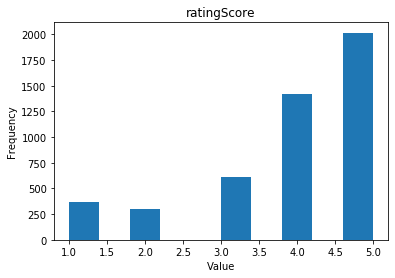

In [0]:
getHistogram(df_with_words,'ratingScore', 'ratingScore')

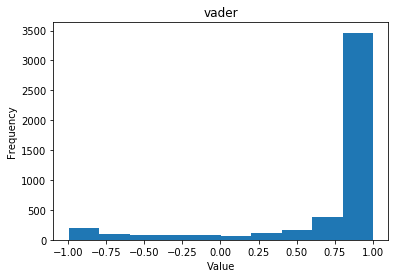

In [0]:
getHistogram(df_with_words,'vader', 'vader')

## **Answer for Q5(a)(a)**

The rating score is more evenly distributed than vader. In Vader histogram, the majority of hotels receive high vader scores.

In [0]:
review_count=df[['hotel_name','review']].groupby(by='hotel_name').count()

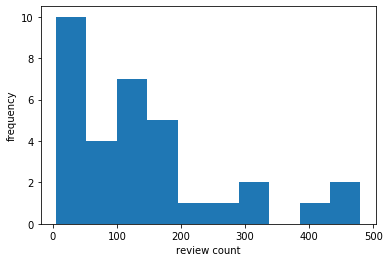

In [0]:
plt.hist(review_count.review.values)
plt.xlabel("review count")
plt.ylabel('frequency')
plt.show()

## **Answer for Q5(a)(b)**

Most hotels have numbers of reviews smaller than 200. This is expected because only very popular or old hotels have many cumulated number of reviews.

## (b). Box plots

In [0]:
hotel_names = df_with_vader['hotel_name'].unique()

In [0]:
def getHotelRank(df,hotel_names,measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotel_names:
        itemDf = df.loc[df['hotel_name']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pd.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotel_name',measure]
    hotelRatingDfGt = hotelRatingDfGt.sort_values(measure,ascending=0)
    return hotelRatingDfGt

In [0]:
hotel_rank_ratscore=getHotelRank(df_with_vader,hotel_names)
hotel_top5_ratscore=hotel_rank_ratscore.head()

In [0]:
hotel_top5_ratscore

,hotel_name,ratingScore
20,Heart Of Burlington Bed and Breakfast,5.000000
29,Creekside B&amp;B and Guest Suite,4.909091
27,Courtyard By Marriott Burlington,4.800000
4,Best Western Premier C Hotel By Carmen&#39;s,4.670833
6,Rose Arden B&amp;B,4.500000


In [0]:
hotel_rank_vader=getHotelRank(df_with_vader,hotel_names,measure='vader')
hotel_top5_vader=hotel_rank_vader.head()

In [0]:
hotel_top5_vader

,hotel_name,vader
20,Heart Of Burlington Bed and Breakfast,0.968500
29,Creekside B&amp;B and Guest Suite,0.941411
6,Rose Arden B&amp;B,0.929675
27,Courtyard By Marriott Burlington,0.901708
4,Best Western Premier C Hotel By Carmen&#39;s,0.877896


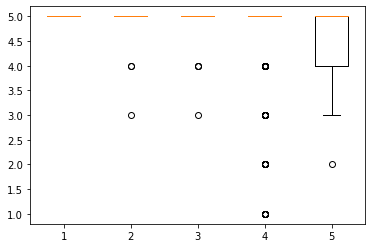

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
Heart_Of_Burlington_rat = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_ratscore['hotel_name'].values[0]]['ratingScore']
Creekside_B_rat = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_ratscore['hotel_name'].values[1]]['ratingScore']
Courtyard_By_Marriott_rat = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_ratscore['hotel_name'].values[2]]['ratingScore']
Best_Western_rat = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_ratscore['hotel_name'].values[3]]['ratingScore']
Rose_Arden_rat = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_ratscore['hotel_name'].values[4]]['ratingScore']

data_rat = [Heart_Of_Burlington_rat, Creekside_B_rat, Courtyard_By_Marriott_rat, Best_Western_rat, Rose_Arden_rat]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data_rat)
plt.show()

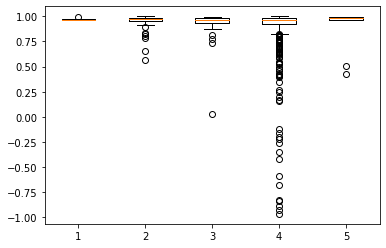

In [0]:
#Plot top 5 side-by-side boxplot for top 5 vader rated hotel
Heart_Of_Burlington_vad = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_vader['hotel_name'].values[0]]['vader']
Creekside_B_vad = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_vader['hotel_name'].values[1]]['vader']
Courtyard_By_Marriott_vad = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_vader['hotel_name'].values[3]]['vader']
Best_Western_vad = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_vader['hotel_name'].values[4]]['vader']
Rose_Arden_vad = df_with_vader.loc[df_with_vader['hotel_name'] == hotel_top5_vader['hotel_name'].values[2]]['vader']

data_vad = [Heart_Of_Burlington_vad, Creekside_B_vad, Courtyard_By_Marriott_vad, Best_Western_vad, Rose_Arden_vad]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data_vad)
plt.show()

In [0]:
Heart_Of_Burlington_rat

3367    5
3368    5
3369    5
3370    5
3371    5
Name: ratingScore, dtype: int64

In [0]:
# mean & variance for groundtruth score
rat_means=[]
rat_vars=[]
for rat in data_rat:
  rat_mean=rat.mean()
  rat_var=rat.var()
  rat_means.append(rat_mean)
  rat_vars.append(rat_var)

df_rat=pd.DataFrame(data={'mean':rat_means,'variance':rat_vars})
df_rat.index=['Heart_Of_Burlington', 'Creekside_B', 'Courtyard_By_Marriott', 'Best_Western', 'Rose_Arden']
display(df_rat)

,mean,variance
Heart_Of_Burlington,5.000000,0.000000
Creekside_B,4.909091,0.131078
Courtyard_By_Marriott,4.800000,0.250000
Best_Western,4.670833,0.638814
Rose_Arden,4.500000,0.684211


In [0]:
# mean & variance for vader
vad_means=[]
vad_vars=[]
for vad in data_vad:
  vad_mean=vad.mean()
  vad_var=vad.var()
  vad_means.append(vad_mean)
  vad_vars.append(vad_var)

df_vad=pd.DataFrame(data={'mean':vad_means,'variance':vad_vars})
df_vad.index=['Heart_Of_Burlington', 'Creekside_B', 'Courtyard_By_Marriott', 'Best_Western', 'Rose_Arden']
display(df_vad)

,mean,variance
Heart_Of_Burlington,0.968500,0.000173
Creekside_B,0.941411,0.008158
Courtyard_By_Marriott,0.901708,0.037762
Best_Western,0.877896,0.079343
Rose_Arden,0.929675,0.025934


## **Answer for Q5(b)**

Box plot is more informative. Because, it shows the relative position of percentiles, max & min values, and outliers. These information visuliaze the shape of distribution of data.

## (c). Scatterplot and heatmap

Text(0.5, 0, 'Vader Score')

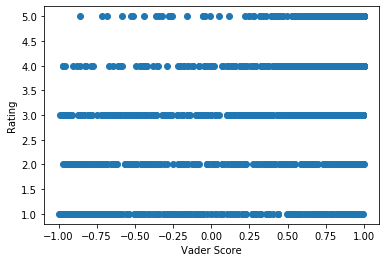

In [0]:
# scatterplot of groundtruth score vs vader score
rating=df_with_words.ratingScore.values
vader=df_with_words.vader.values
plt.plot(vader, rating,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
# gaussian kernal density estimation
from scipy.stats.kde import gaussian_kde
x=vader
y=rating
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

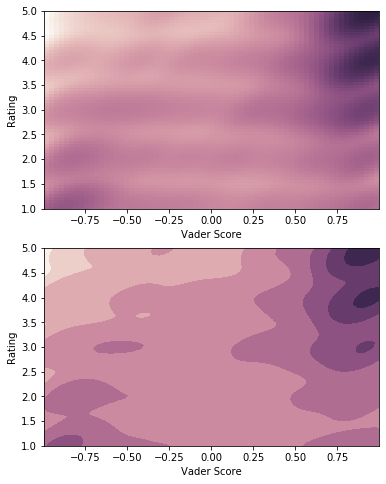

In [0]:
# heatmap of groundtruth score vs vader score
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

## **Answer for Q5(c)(a)**

If vader matches groundtruth rating exactly, the scatterplot should be a diagonal line and the heatmap should be dark on the diagonal and light elsewhere. However it is not the case in this dataset. 

It seems that vader cam only recognize extreme ratings well. But for two-star and 3-star ratings, their vader score are quite uniform.

This tells us vader can not capture the groundtruth rating from a review very well. The reason would be that vader rates a review word by word, however, human's rating can only be understood by analyzing the entire context.

In [0]:
review_len=[len(review) for review in df_with_words.review.values]

Text(0.5, 0, 'rating')

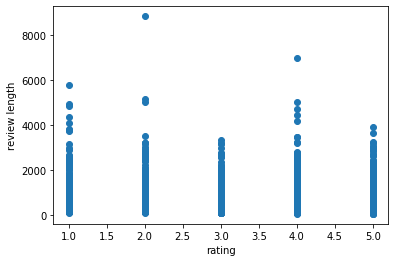

In [0]:
# scatterplot of review length vs groundtruth score
plt.plot(rating, review_len,"o")
plt.ylabel('review length')
plt.xlabel('rating')

Text(0, 0.5, 'review length')

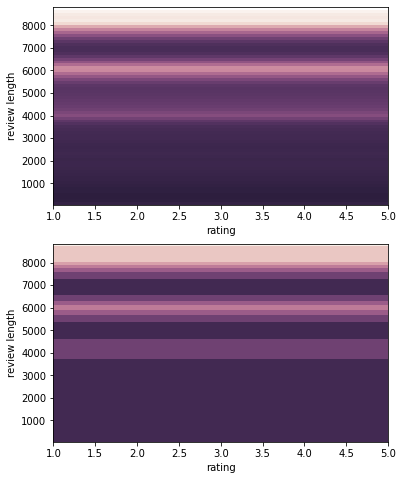

In [0]:
# heatmap of review length vs groundtruth score
l=np.array(review_len)
k = gaussian_kde(np.vstack([y, l]))
yi_1, li = np.mgrid[y.min():y.max():y.size**0.5*1j,l.min():l.max():l.size**0.5*1j]
zi = k(np.vstack([yi.flatten(), li.flatten()]))

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(yi_1, li, np.log10(zi.reshape(yi_1.shape)), cmap=cmap)
ax2.contourf(yi_1, li, np.log10(zi.reshape(yi_1.shape)), cmap=cmap)

ax1.set_xlim(y.min(), y.max())
ax1.set_ylim(l.min(), l.max())
ax2.set_xlim(y.min(), y.max())
ax2.set_ylim(l.min(), l.max())

ax1.set_xlabel('rating')
ax1.set_ylabel('review length')

ax2.set_xlabel('rating')
ax2.set_ylabel('review length')

Text(0.5, 0, 'vader')

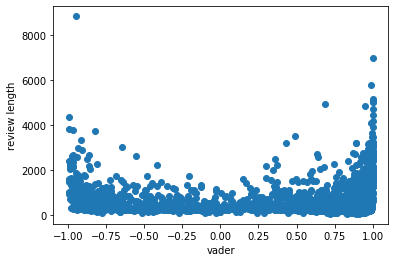

In [0]:
# scatterplot of review length vs vader score
plt.plot(vader, review_len,"o")
plt.ylabel('review length')
plt.xlabel('vader')

Text(0, 0.5, 'review length')

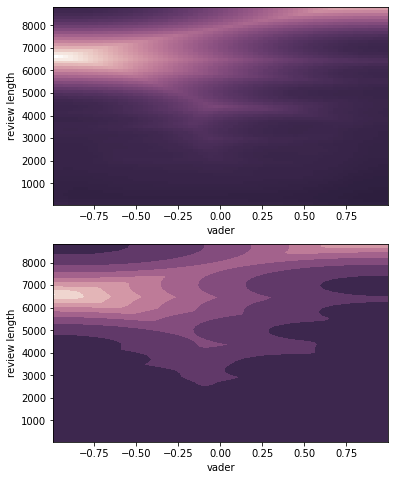

In [0]:
# heatmap of review length vs vader score
l=np.array(review_len)
k = gaussian_kde(np.vstack([x, l]))
xi_1, li = np.mgrid[x.min():x.max():x.size**0.5*1j,l.min():l.max():l.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), li.flatten()]))

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi_1, li, np.log10(zi.reshape(xi_1.shape)), cmap=cmap)
ax2.contourf(xi_1, li, np.log10(zi.reshape(xi_1.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(l.min(), l.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(l.min(), l.max())

ax1.set_xlabel('vader')
ax1.set_ylabel('review length')

ax2.set_xlabel('vader')
ax2.set_ylabel('review length')

## **Answer for Q5(c)(b)**

The groundtruth rating seems uncorrelated with length of reviews.

The vader tends to give extreme scores (-1 or 1) to long reviews.

In [0]:
df_hotel_rating=df_with_words[['hotel_name','ratingScore','vader']]
df_hotel_rating=df_hotel_rating.groupby(by=['hotel_name']).mean()

In [0]:
hotel_avgrating=df_hotel_rating.ratingScore.values
hotel_vader=df_hotel_rating.vader.values

Text(0.5, 0, 'hotel_vader')

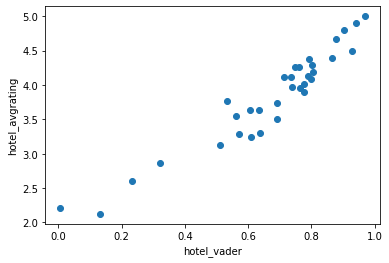

In [0]:
# scatterplot ratingscore vs vader of hotels
plt.plot(hotel_vader, hotel_avgrating,"o")
plt.ylabel('hotel_avgrating')
plt.xlabel('hotel_vader')

Text(0, 0.5, 'hotel rating')

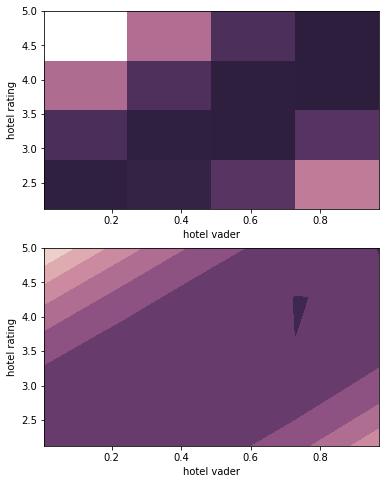

In [0]:
# heatmap of rating score vs vader score of hotels
x2=hotel_vader
y2=hotel_avgrating
k = gaussian_kde(np.vstack([x2, y2]))
xi_2, yi_2 = np.mgrid[x2.min():x2.max():x2.size**0.5*1j,y2.min():y2.max():y2.size**0.5*1j]
zi = k(np.vstack([xi_2.flatten(), yi_2.flatten()]))

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi_2, yi_2, np.log10(zi.reshape(xi_2.shape)), cmap=cmap)
ax2.contourf(xi_2, yi_2, np.log10(zi.reshape(xi_2.shape)), cmap=cmap)

ax1.set_xlim(xi_2.min(), xi_2.max())
ax1.set_ylim(yi_2.min(), yi_2.max())
ax2.set_xlim(xi_2.min(), xi_2.max())
ax2.set_ylim(yi_2.min(), yi_2.max())

ax1.set_xlabel('hotel vader')
ax1.set_ylabel('hotel rating')

ax2.set_xlabel('hotel vader')
ax2.set_ylabel('hotel rating')

## **Answer for Q5(c)(c)**

Unlike rating & vader per review, the average rating & vader of hotels match quite well. The reason would be that, although vader is not good at recognizing 2-star and 3-star ratings, it does well on recognizing extreme ratings (1-star, 4-star, 5-star). Therefore, when averaging these vader ratings over a hotel's reviews, its can match the groundtruth relatively well. 

# Validation

In [0]:
def submission():
    """remove this function before submission
    """
    assert False, "I didn't submit assignment on time!"

In [0]:
submission()

AssertionError: ignored